Generated Points:
P1: (37.45, 95.07)
P2: (73.20, 59.87)
P3: (15.60, 15.60)
P4: (5.81, 86.62)
P5: (60.11, 70.81)
P6: (2.06, 96.99)
P7: (83.24, 21.23)
P8: (18.18, 18.34)
P9: (30.42, 52.48)
P10: (43.19, 29.12)

Closest Pair Results:
Brute Force: Points P3 and P8, Distance: 3.7647, Time: 0.000073s
Divide & Conquer: Points P3 and P8, Distance: 3.7647, Time: 0.000302s


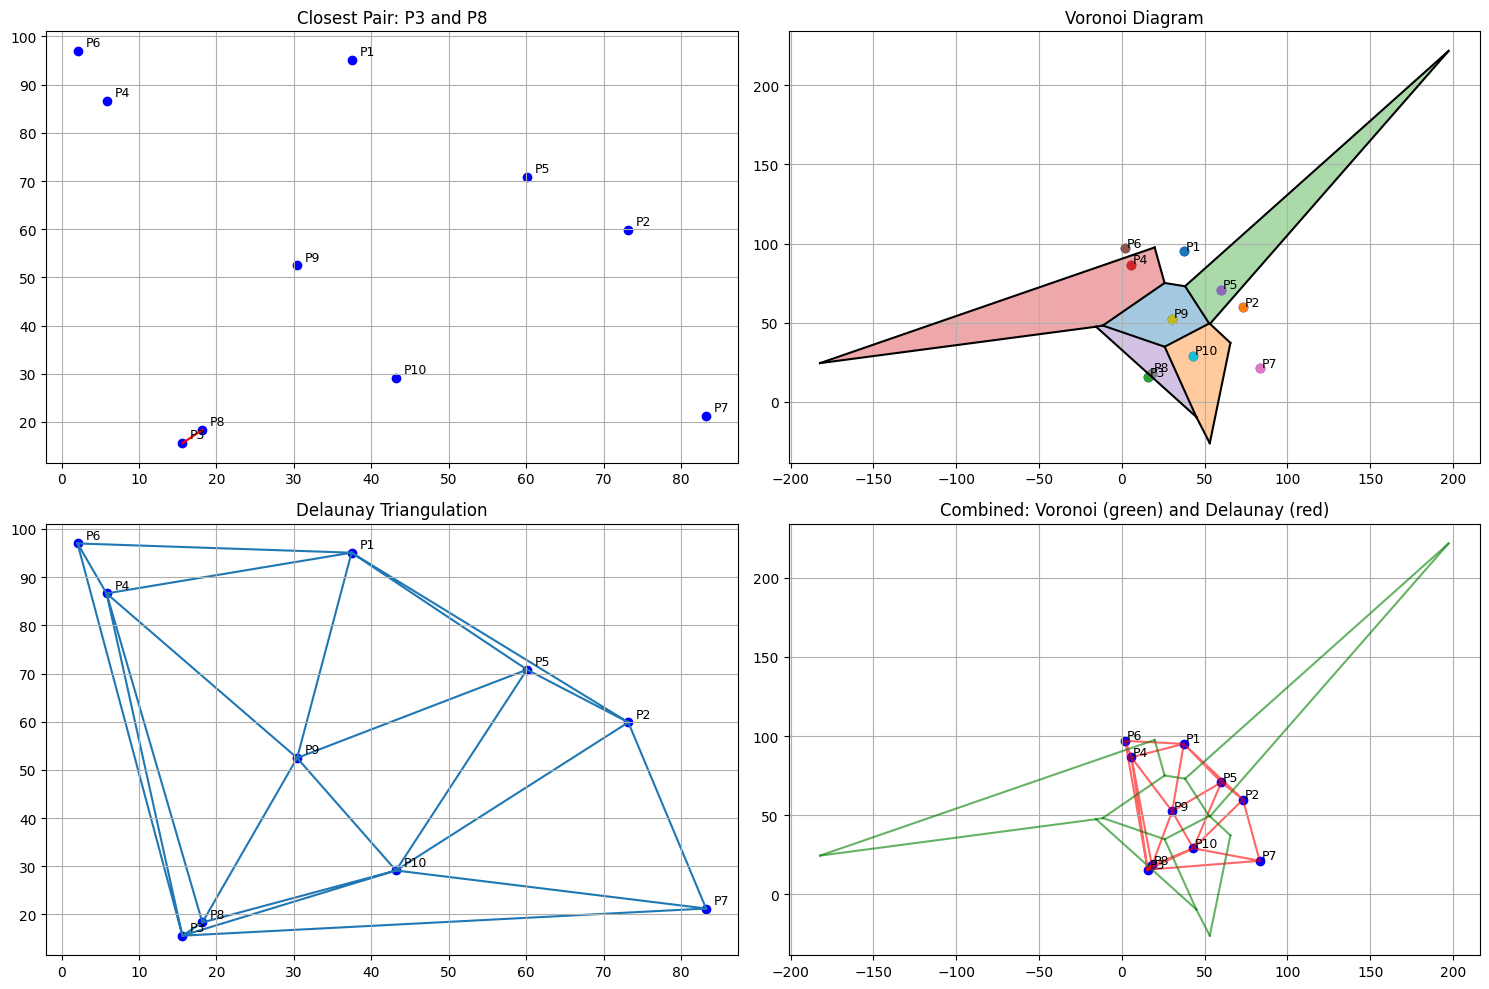


Delaunay Triangulation Edges:
Edge: P1 - P2
Edge: P1 - P4
Edge: P1 - P5
Edge: P1 - P6
Edge: P1 - P9
Edge: P2 - P5
Edge: P2 - P7
Edge: P2 - P10
Edge: P3 - P4
Edge: P3 - P6
Edge: P3 - P7
Edge: P3 - P8
Edge: P3 - P10
Edge: P4 - P6
Edge: P4 - P8
Edge: P4 - P9
Edge: P5 - P9
Edge: P5 - P10
Edge: P7 - P10
Edge: P8 - P9
Edge: P8 - P10
Edge: P9 - P10


In [5]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.spatial import Voronoi, Delaunay
import math
import time

# 1. Generate 10 random points (you can also define your own set of points)
np.random.seed(42)  # For reproducibility
points = np.random.rand(10, 2) * 100  # 10 random points in 2D space
print("Generated Points:")
for i, p in enumerate(points):
    print(f"P{i+1}: ({p[0]:.2f}, {p[1]:.2f})")

# 2. Find the closest pair of points - Brute Force approach for comparison
def distance(p1, p2):
    return math.sqrt((p1[0] - p2[0])**2 + (p1[1] - p2[1])**2)

def closest_pair_brute_force(points):
    n = len(points)
    min_dist = float('inf')
    closest_pair = (0, 0)
    
    for i in range(n):
        for j in range(i+1, n):
            dist = distance(points[i], points[j])
            if dist < min_dist:
                min_dist = dist
                closest_pair = (i, j)
    
    return closest_pair, min_dist

# 3. Implementation of the Divide and Conquer algorithm
def closest_pair_strip(strip, d):
    """Find the closest pair of points in a strip"""
    min_dist = d
    closest_pair = None
    
    # Sort points by y coordinate
    strip = strip[strip[:, 1].argsort()]
    
    # For each point, check at most 7 points ahead (proven to be sufficient)
    for i in range(len(strip)):
        j = i + 1
        while j < len(strip) and (strip[j][1] - strip[i][1]) < min_dist:
            dist = distance(strip[i], strip[j])
            if dist < min_dist:
                min_dist = dist
                closest_pair = (strip[i], strip[j])
            j += 1
    
    return closest_pair, min_dist

def closest_pair_recursive(points_sorted_x, points_sorted_y):
    """Find closest pair using divide and conquer"""
    n = len(points_sorted_x)
    
    # Base case: if we have 2 or 3 points, use brute force
    if n <= 3:
        min_dist = float('inf')
        closest_pair = None
        for i in range(n):
            for j in range(i+1, n):
                dist = distance(points_sorted_x[i], points_sorted_x[j])
                if dist < min_dist:
                    min_dist = dist
                    closest_pair = (points_sorted_x[i], points_sorted_x[j])
        return closest_pair, min_dist
    
    # Divide the points into two halves
    mid = n // 2
    midpoint = points_sorted_x[mid]
    
    # Create left and right subarrays
    left_x = points_sorted_x[:mid]
    right_x = points_sorted_x[mid:]
    
    # Split points sorted by y into left and right
    left_y = []
    right_y = []
    for point in points_sorted_y:
        if point[0] <= midpoint[0]:
            left_y.append(point)
        else:
            right_y.append(point)
    left_y = np.array(left_y)
    right_y = np.array(right_y)
    
    # Recursive calls
    left_pair, left_dist = closest_pair_recursive(left_x, left_y)
    right_pair, right_dist = closest_pair_recursive(right_x, right_y)
    
    # Find the closer of the two pairs
    if left_dist < right_dist:
        closest_pair = left_pair
        min_dist = left_dist
    else:
        closest_pair = right_pair
        min_dist = right_dist
    
    # Create a strip of points around the vertical midline
    strip = []
    for point in points_sorted_y:
        if abs(point[0] - midpoint[0]) < min_dist:
            strip.append(point)
    strip = np.array(strip)
    
    # Find the closest pair in the strip (if any)
    if len(strip) > 1:
        strip_pair, strip_dist = closest_pair_strip(strip, min_dist)
        if strip_pair and strip_dist < min_dist:
            closest_pair = strip_pair
            min_dist = strip_dist
    
    return closest_pair, min_dist

def closest_pair_divide_conquer(points):
    """Wrapper for the divide and conquer algorithm"""
    # Sort points by x and y coordinates
    points_sorted_x = points[points[:, 0].argsort()]
    points_sorted_y = points.copy()
    
    closest, dist = closest_pair_recursive(points_sorted_x, points_sorted_y)
    
    # Find indices in the original array
    i, j = -1, -1
    for idx1, p1 in enumerate(points):
        for idx2, p2 in enumerate(points):
            if idx1 != idx2 and np.array_equal(p1, closest[0]) and np.array_equal(p2, closest[1]):
                i, j = idx1, idx2
                break
    
    return (i, j), dist

# Compute closest pair with both methods
start_time = time.time()
bf_pair, bf_dist = closest_pair_brute_force(points)
bf_time = time.time() - start_time

start_time = time.time()
dc_pair, dc_dist = closest_pair_divide_conquer(points)
dc_time = time.time() - start_time

print("\nClosest Pair Results:")
print(f"Brute Force: Points P{bf_pair[0]+1} and P{bf_pair[1]+1}, Distance: {bf_dist:.4f}, Time: {bf_time:.6f}s")
print(f"Divide & Conquer: Points P{dc_pair[0]+1} and P{dc_pair[1]+1}, Distance: {dc_dist:.4f}, Time: {dc_time:.6f}s")

# 4. Construct Voronoi diagram using scipy
vor = Voronoi(points)

# 5. Construct Delaunay triangulation using scipy
tri = Delaunay(points)

# Visualization
plt.figure(figsize=(15, 10))

# Plot 1: Points and Closest Pair
plt.subplot(2, 2, 1)
plt.scatter(points[:, 0], points[:, 1], c='blue')
for i, p in enumerate(points):
    plt.text(p[0]+1, p[1]+1, f'P{i+1}', fontsize=9)
plt.plot([points[bf_pair[0]][0], points[bf_pair[1]][0]], 
         [points[bf_pair[0]][1], points[bf_pair[1]][1]], 'r-')
plt.title(f'Closest Pair: P{bf_pair[0]+1} and P{bf_pair[1]+1}')
plt.grid(True)

# Plot 2: Voronoi Diagram
plt.subplot(2, 2, 2)
plt.scatter(points[:, 0], points[:, 1], c='blue')
for i, p in enumerate(points):
    plt.text(p[0]+1, p[1]+1, f'P{i+1}', fontsize=9)

# Plot Voronoi diagram
for i, region in enumerate(vor.regions):
    if not -1 in region and len(region) > 0:
        polygon = [vor.vertices[i] for i in region]
        plt.fill(*zip(*polygon), alpha=0.4)

for i, (x, y) in enumerate(zip(vor.points[:, 0], vor.points[:, 1])):
    plt.plot(x, y, 'o')

for simplex in vor.ridge_vertices:
    if -1 not in simplex:
        plt.plot(vor.vertices[simplex, 0], vor.vertices[simplex, 1], 'k-')

plt.title('Voronoi Diagram')
plt.grid(True)

# Plot 3: Delaunay Triangulation
plt.subplot(2, 2, 3)
plt.scatter(points[:, 0], points[:, 1], c='blue')
for i, p in enumerate(points):
    plt.text(p[0]+1, p[1]+1, f'P{i+1}', fontsize=9)
plt.triplot(points[:, 0], points[:, 1], tri.simplices)
plt.title('Delaunay Triangulation')
plt.grid(True)

# Plot 4: Combined view
plt.subplot(2, 2, 4)
plt.scatter(points[:, 0], points[:, 1], c='blue')
for i, p in enumerate(points):
    plt.text(p[0]+1, p[1]+1, f'P{i+1}', fontsize=9)

# Plot Voronoi
for simplex in vor.ridge_vertices:
    if -1 not in simplex:
        plt.plot(vor.vertices[simplex, 0], vor.vertices[simplex, 1], 'g-', alpha=0.6)

# Plot Delaunay
plt.triplot(points[:, 0], points[:, 1], tri.simplices, color='red', alpha=0.6)

# Plot closest pair
plt.plot([points[bf_pair[0]][0], points[bf_pair[1]][0]], 
         [points[bf_pair[0]][1], points[bf_pair[1]][1]], 'r-', linewidth=2)

plt.title('Combined: Voronoi (green) and Delaunay (red)')
plt.grid(True)

plt.tight_layout()
plt.savefig('computational_geometry_results.png')
plt.show()

# Print the points that form the Delaunay triangulation edges
print("\nDelaunay Triangulation Edges:")
edges = set()
for simplex in tri.simplices:
    edges.add((min(simplex[0], simplex[1]), max(simplex[0], simplex[1])))
    edges.add((min(simplex[1], simplex[2]), max(simplex[1], simplex[2])))
    edges.add((min(simplex[0], simplex[2]), max(simplex[0], simplex[2])))

for i, j in sorted(edges):
    print(f"Edge: P{i+1} - P{j+1}")